In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [10]:
# Pre-define alpha level according to the guideline
alpha_level = 0.005

In [11]:
file = pd.read_csv('movieReplicationSet.csv')

In [12]:
movies = file.iloc[:, 0:400]

In [13]:
# Convert the data into numeric type for calculation
# Assuming every data is valuable, I keep the NaN data 
# (not doing the row-wise removal of NaN here in contributing the rating of each movie).

movies = movies.apply(pd.to_numeric, errors='coerce')

## 1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [6]:
# Find median popularity of all movies
# Assumption - the greater the number of ratings the more popular the movie is

# Find how many non-NaN ratings per movie has
movies_popularity = movies.count()

# Find the median of the popularity
popularity_med = movies_popularity.median()

In [7]:
# Find Averages of Each Movie

# Use mean here to measure the ratings of each movie because mean is a quick way to provide a summary of 
# the overall ratings of a movie. Outlier ratings are expected and included when calculating means because
# they also reflect a population, no matter how small or large that population is, that might have an impact 
# in the real world to contribute to a more comprehensive rating of the movie.

# Find means of all movies
movies_mean = movies.mean()

# Split means of all movies
movies_mean_low_popularity = movies.mean()[movies_popularity <= popularity_med]
movies_mean_high_popularity = movies.mean()[movies_popularity > popularity_med]

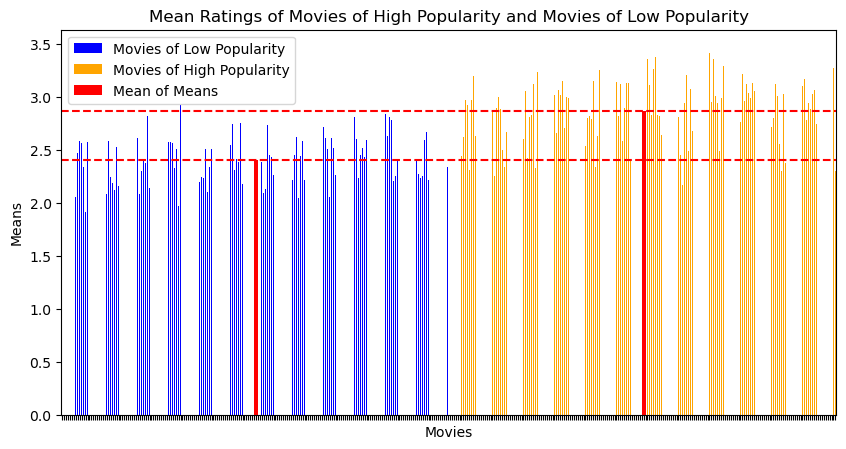

In [22]:
# Visualize the mean ratings of both categories to see if there is a clear cut of mean ratings
# between movies of low and high popularity (sorry the visualization is messy)

# For visualization, concat the means of all movies based on popularity
movies_mean = pd.concat([movies_mean_low_popularity, movies_mean_high_popularity], axis=1)
movies_mean.columns = ['Movies of Low Popularity', 'Movies of High Popularity']

# Plot the graph
movies_mean.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 5))

# Plot the mean of means just to make everything clear
plt.bar([len(movies_mean_low_popularity)/2], [np.mean(movies_mean_low_popularity), np.mean(movies_mean_low_popularity)], color='red', width=2, label="Mean of Means")
plt.bar([len(movies_popularity)/2 + len(movies_mean_low_popularity)/2], [np.mean(movies_mean_high_popularity), np.mean(movies_mean_high_popularity)], color='red', width=2)
plt.axhline(y=np.mean(movies_mean_low_popularity), color='red', linestyle='--')
plt.axhline(y=np.mean(movies_mean_high_popularity), color='red', linestyle='--')

plt.xticks(visible=False) # Hide the movies' names because they are too long
plt.title("Mean Ratings of Movies of High Popularity and Movies of Low Popularity")
plt.xlabel("Movies")
plt.ylabel("Means")
plt.legend()
plt.show()

# Macroscopically, there is a seemingly difference between the average ratings of popular movies 
# and unpopular movies, but the difference is not very obvious in some microscopic scales, so we
# are going to use a statistical test to further explore.

In [23]:
# Check if the variances of the two groups are similar
var_low_popularity = np.var(movies_mean_low_popularity)
var_high_popularity = np.var(movies_mean_high_popularity)

var_low_popularity, var_high_popularity 

# (0.053310098425527405, 0.08457741997025411) - similar variances

(0.053310098425527405, 0.08457741997025411)

In [24]:
# Check to see the sample sizes of popular and unpopular movies

# A simple comparison of the mean popularity between two groups
np.mean(movies_popularity[movies_popularity <= popularity_med]), np.mean(movies_popularity[movies_popularity > popularity_med])

# (110.0, 451.07) - the sample sizes are quite different

(110.0, 451.07)

In [39]:
# Choosing a significance test to use

# -> it is not reasonable to deduce the data to sample means due to unequal sample sizes
# -> two categories to be compared 
# -> do not know the population parameters because only those who wanted to take the survey took the survey 
# -> not having a large large inter-individual variability 
# -> similar variances, but the sample size is quite different
# -> Welch's T-test

# Null Hypothesis - ratings do not correspond to popularities

### Reject null hypothesis - there is a statistical significance in the correspondence between ratings and popularity

statistic, pvalue = stats.ttest_ind(movies_mean_low_popularity, movies_mean_high_popularity, equal_var=False)

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 9.536936590853455e-52
We reject the null hypothesis because the p-value is smaller than the alpha.


### Ans - There is a statistical significance in the correspondence of ratings and popularity according to the p-value of the Welch's T-test, so movies that are more popular are probably rated higher than movies that are less popular

## 2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

In [26]:
# Find median year of release of all movies

# Order movies based on years
# Assumption - year data is inside of the string parenthesis
# Cite: Regular Expression for finding the content inside of the parenthesis (https://www.geeksforgeeks.org/python-extract-substrings-between-brackets/)

import re

def find_year(movie_name):
    # find year inside of the parenthesis and conver the year data into integers
    return int(re.findall(r'\((.*?)\)', movie_name)[0])

# Find median year
movies_year = pd.Series(movies.columns).apply(find_year)
year_med = movies_year.median() # 1999
movies_year = pd.concat([pd.Series(movies.columns), movies_year], axis=1)

# Sort movie means based on its release time
movies_mean_old = movies.mean()[movies_year[movies_year[1] <= year_med][0]]
movies_mean_new = movies.mean()[movies_year[movies_year[1] > year_med][0]]

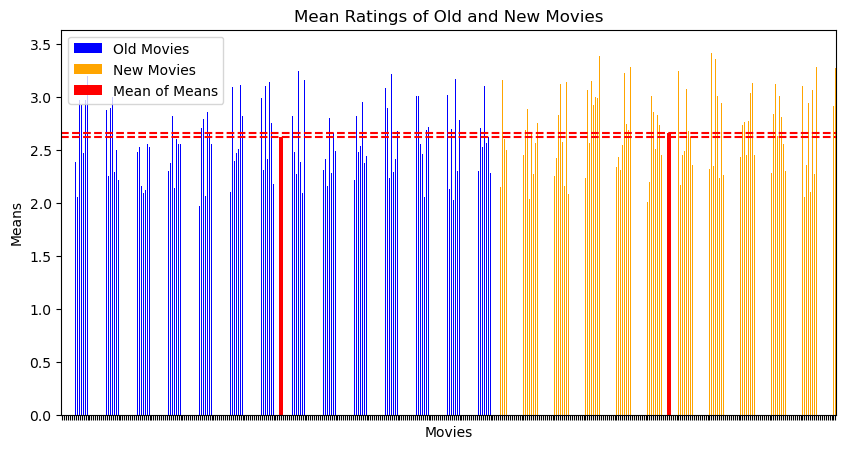

In [27]:
# Repeat what has done in the previous question for visualizing all means of two groups

# For visualization, concat the means of all movies based on their release years
movies_mean = pd.concat([movies_mean_old, movies_mean_new], axis=1)
movies_mean.columns = ['Old Movies', 'New Movies']

# Plot the graph
movies_mean.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 5))

# Plot the mean of means just to make everything clear
plt.bar([len(movies_mean_old)/2], [np.mean(movies_mean_old), np.mean(movies_mean_old)], color='red', width=2, label="Mean of Means")
plt.bar([len(movies_year)/2 + len(movies_mean_old)/2], [np.mean(movies_mean_new), np.mean(movies_mean_new)], color='red', width=2)
plt.axhline(y=np.mean(movies_mean_old), color='red', linestyle='--')
plt.axhline(y=np.mean(movies_mean_new), color='red', linestyle='--')

plt.xticks(visible=False) # Hide the movies' names because they are too long
plt.title("Mean Ratings of Old and New Movies")
plt.xlabel("Movies")
plt.ylabel("Means")
plt.legend()
plt.show()

# Clearly, there is only tiny difference between the mean ratings of two groups of movies. 

### Ans - Movies that are newer are not really rated differently than movies that are older.

## 3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [8]:
# Separate Shrek ratings into groups of female and male

shrek_ratings = file['Shrek (2001)']
movies_genders = file.iloc[:, 474]

shrek_genders_f = pd.concat([shrek_ratings, movies_genders], axis=1)[movies_genders == 1]['Shrek (2001)']
shrek_genders_m = pd.concat([shrek_ratings, movies_genders], axis=1)[movies_genders == 2]['Shrek (2001)']

In [9]:
# Since there is a large discrepency between sample rating sizes contribued by the female viewers 
# and that contributed by the male viewers, deducing the data to samples means would not be
# reasonable because one group might be more susceptible to bias than the other.

print('Size of Female Viewers:', len(shrek_genders_f))
print('Size of Male Viewers:', len(shrek_genders_m))
print()
print('Variance of Female Viewers:', np.var(shrek_genders_f))
print('Variance of Male Viewers:', np.var(shrek_genders_m))

Size of Female Viewers: 807
Size of Male Viewers: 260

Variance of Female Viewers: 0.8207206244373231
Variance of Male Viewers: 0.6777603691396509


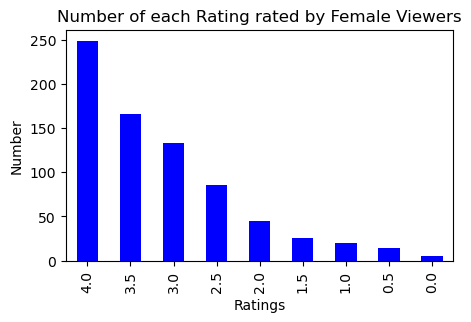

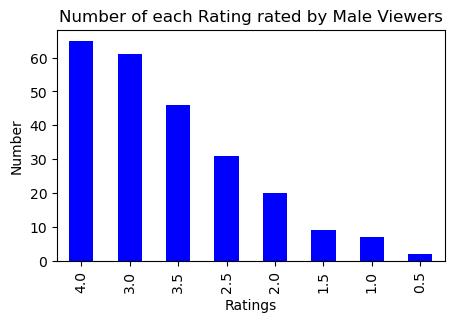

In [10]:
# Concat two ratings into one DataFrame for statistical use

shrek_genders_f.value_counts().plot(kind='bar', color='blue', figsize=(5, 3))
plt.title("Number of each Rating rated by Female Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

shrek_genders_m.value_counts().plot(kind='bar', color='blue', figsize=(5, 3))
plt.title("Number of each Rating rated by Male Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

# The data distribution of both groups are somewhat skewed so we are going to use medians in statistical test

In [31]:
# Choose a statistical test to use

# -> it is not reasonable to deduce the data to sample means due to unequal sample sizes
# -> the data is not categorical
# -> 2 groups are compared
# -> compare the medians as mentioned above
# -> Mann Whitney U Test

# Null Hypothesis - ratings do not correspond to genders

statistic, pvalue = stats.mannwhitneyu(shrek_genders_f.dropna(), shrek_genders_m.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.050536625925559006
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### Ans - There isn't a statistical significance in the correspondence of ratings and genders according to the p-value of the Mann Whitney U test, so the enjoyment of Shrek (2001) is probably not gendered.

## 4) What proportion of movies are rated differently by male and female viewers?

In [32]:
# Expand what have done above to deduce if the ratings of Shrek (2001) movie is gendered.

# Assumption: The characteristics of ratings of Shrek (2001) (e.g., the sample sizes bewteen ratings 
# provided by female viewers and those provided by male viewers are unequal) would be similar to all 
# other movies.

movies_genders_f = movies[movies_genders == 1]
movies_genders_m = movies[movies_genders == 2]

pvalues_genders = {}


# Perform Mann Whitney U test in every movie

for c in movies.columns:
    statistic, pvalue = stats.mannwhitneyu(movies_genders_f[c].dropna(), movies_genders_m[c].dropna())
    pvalues_genders[c] = pvalue

In [37]:
# Null Hypothesis - the ratings are not gendered - so if the p-value of a movie is less than the alpha level
# then we reject the null hypothesis and states that the ratings of that movie is gendered (or rated
# differently by male and female viewers).

# Proportion = the number of movies with gendered ratings / the total number of movies

ratio = len([v for v in pvalues_genders.values() if v < alpha_level]) / 400
ratio*100

12.5

### Ans - 12.5% of the movies are rated differently by male and female viewers.

## 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [11]:
# Separate The Lion King (1994) ratings into groups of only-children and and groups with siblings

# Would not consider the ratings made by those who did not respond to this question because we do not know
# which categories they fit into, and incorporating them into either category would introduce bias

lion_ratings = file['The Lion King (1994)']
movies_onlychild = file.iloc[:, 475] # 1 - Yes; 0 - No; -1 - Did not respond

# Ratings provided by those who are only-children
lion_onlychild_y = pd.concat([lion_ratings, movies_onlychild], axis=1)[movies_onlychild == 1]['The Lion King (1994)']
# Ratings provided by those who are having siblings
lion_onlychild_n = pd.concat([lion_ratings, movies_onlychild], axis=1)[movies_onlychild == 0]['The Lion King (1994)']

In [12]:
# Since there is a large discrepency between sample rating sizes contribued by the only-child viewers 
# and that contributed by the non-only-child viewers, so again, deducing the data to samples 
# means would not be reasonable because one group might be more susceptible to bias than the other.

print('Size of Viewers who are only-children:', len(lion_onlychild_y))
print('Size of Viewers who are not only-children:', len(lion_onlychild_n))
print()
print('Variance of Viewers who are only-children:', np.var(lion_onlychild_y))
print('Variance of Viewers who are not only-children:', np.var(lion_onlychild_n))

Size of Viewers who are only-children: 177
Size of Viewers who are not only-children: 894

Variance of Viewers who are only-children: 0.6622297267663698
Variance of Viewers who are not only-children: 0.5151384312891866


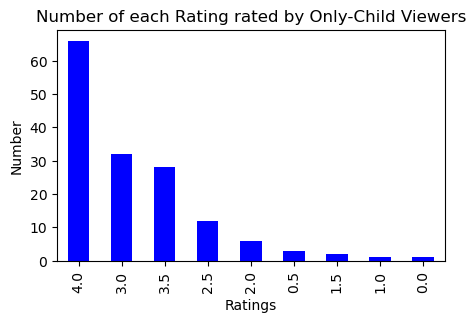

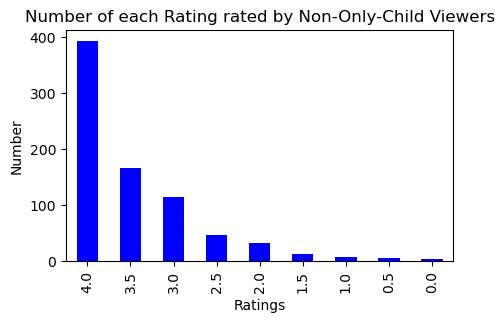

In [13]:
# Concat two ratings into one DataFrame for statistical use

lion_onlychild_y.value_counts().plot(kind='bar', color='blue', figsize=(5, 3))
plt.title("Number of each Rating rated by Only-Child Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

lion_onlychild_n.value_counts().plot(kind='bar', color='blue', figsize=(5, 3))
plt.title("Number of each Rating rated by Non-Only-Child Viewers")
plt.xlabel("Ratings")
plt.ylabel("Number")
plt.show()

# The data distribution of both groups are somewhat skewed so we are going to use medians in statistical test

In [61]:
# Choose a statistical test to use

# -> it is not reasonable to deduce the data to sample means due to unequal sample sizes
# -> the data is not categorical
# -> 2 groups are compared
# -> compare the medians as mentioned above
# -> Mann Whitney U Test

# Null Hypothesis - ratings do not correspond to if the viewers are only-children

statistic, pvalue = stats.mannwhitneyu(lion_onlychild_y.dropna(), lion_onlychild_n.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.04319872995682849
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### Ans - Only-child viewers are probably not enjoying the Lion King (1994) more than viewers with siblings

## 6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [62]:
# Expand what have done above to deduce if the ratings of The Lion King (1994) movie exhibits 
# the "only child effect."

# Assumption: The characteristics of ratings of The Lion King (1994) (e.g., the sample sizes bewteen ratings 
# provided by the two groups are unequal) would be similar to all other movies.

movies_onlychild_y = movies[movies_onlychild == 1]
movies_onlychild_n = movies[movies_onlychild == 0]

pvalues_onlychild = {}

# Perform Mann Whitney U test in every movie

for c in movies.columns:
    statistic, pvalue = stats.mannwhitneyu(movies_onlychild_y[c].dropna(), movies_onlychild_n[c].dropna())
    pvalues_onlychild[c] = pvalue

In [63]:
# Null Hypothesis - the ratings are not affected by the "only child effect" - so if the p-value of a 
# movie is less than the alpha level then we reject the null hypothesis and states that the ratings 
# of that movie is affected by the "only child effect"

# Proportion = the number of movies with gendered ratings / the total number of movies

ratio = len([v for v in pvalues_onlychild.values() if v < alpha_level]) / 400
ratio*100

1.7500000000000002

### Ans - 1.75% of the movies exhibit an "only child effect."

## 7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [14]:
# Separate The Wolf of Wall Street (2013) ratings into groups of those who watch alone and who don't

# Again, would not consider the ratings made by those who did not respond to this question because we 
# do not know which categories they fit into, and incorporating them into either category would introduce bias

wolf_ratings = file['The Wolf of Wall Street (2013)']
movies_social = file.iloc[:, 476] # Watch alone? 1 - Yes; 0 - No; -1 - Did not respond

# Ratings provided by those who watch socially 
wolf_social_y = pd.concat([wolf_ratings, movies_social], axis=1)[movies_social == 0]['The Wolf of Wall Street (2013)']
# Ratings provided by those who watch alone
wolf_social_n = pd.concat([wolf_ratings, movies_social], axis=1)[movies_social == 1]['The Wolf of Wall Street (2013)']

In [46]:
# Calculating Coefficient of Variation
# Cite: https://www.researchgate.net/post/What_are_the_acceptable_values_for_the_percentage_deviation_DEV_and_the_coefficient_of_variance_CV#:~:text=Definition%20of%20CV%3A%20The%20coefficient,CV%3E30%20is%20not%20acceptable.

mean_wolf_ratings = np.mean(wolf_ratings)
std_dev_wolf_ratings = np.std(wolf_ratings)
cv_wolf_ratings = std_dev_wolf_ratings / mean_wolf_ratings

print ('The coefficient of variation is:', cv_wolf_ratings)
if (cv_wolf_ratings < 0.2):
    print('The variability is low (<0.2).')
elif (cv_wolf_ratings >= 0.2 and cv_wolf_ratings < 0.3):
    print('The variability is acceptable (0.2 - 0.3).')
else:
    print('The variability is high (>0.3).')

The coefficient of variation is: 0.28698066692009994
The variability is acceptable (0.2 - 0.3).


In [30]:
# The sample size and the variance of the viewers who watch socially and alone is quite balanced, so
# it is reasonable to reduce the two data into sample means to compare

print('Size of Viewers who watch socially:', len(wolf_social_y))
print('Size of Viewers who watch alone:', len(wolf_social_n))
print()
print('Variance of Viewers who watch socially:', np.var(wolf_social_y))
print('Variance of Viewers who watch alone:', np.var(wolf_social_n))

Size of Viewers who watch socially: 462
Size of Viewers who watch alone: 610

Variance of Viewers who watch socially: 0.8451851851851819
Variance of Viewers who watch alone: 0.7547766576669341


In [49]:
# Choose a statistical test to use

# -> it is reasonable to deduce the data to sample means
# -> we do not know the population paramter (we do not know the overall underlying population)
# -> variability is present but acceptable
# -> similar variance
# -> Independent samples t-test

# Null Hypothesis - ratings do not correspond to if the viewers are social

statistics, pvalue = stats.ttest_ind(wolf_social_y.dropna(), wolf_social_n.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.11738913665664577
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### Ans - There isn't statistical significance in the correspondence of ratings and if they are watching 'The Wolf of Wall Street (2013)' socially according to the p-value of the the Paired Sample T-Test

## 8) What proportion of movies exhibit such a “social watching” effect?

In [21]:
# Expand what have done above to deduce if the ratings of The Wolf of Wall Street (2013) movie exhibits 
# the "social watching" effect.

# Assumption: The characteristics of ratings of The Wolf of Wall Street (2013) is acquired by all other movies.

movies_social_y = movies[movies_social == 0]
movies_social_n = movies[movies_social == 1]

pvalues_social = {}

# Perform Independent sample t-test in every movie

for c in movies.columns:
    statistics, pvalue = stats.ttest_ind(movies_social_y[c], movies_social_n[c])
    pvalues_social[c] = pvalue

In [22]:
# Null Hypothesis - the ratings are not gendered - so if the p-value of a movie is less than the alpha level
# then we reject the null hypothesis and states that the ratings of that movie is gendered (or rated
# differently by male and female viewers).

# Proportion = the number of movies with gendered ratings / the total number of movies

ratio = len([v for v in pvalues_social.values() if v < alpha_level]) / 400
ratio*100

0.0

### Ans - Almost no movies exhibit a "social watching" effect.

## 9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [7]:
home_ratings = movies['Home Alone (1990)'].dropna()
finding_ratings = movies['Finding Nemo (2003)'].dropna()

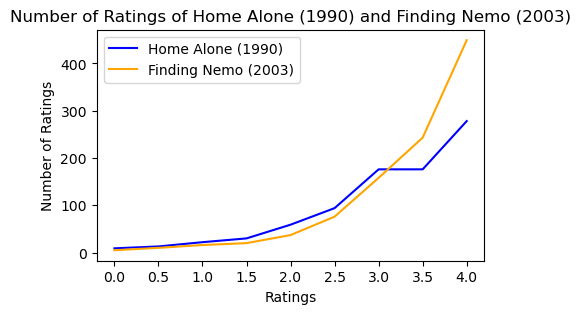

In [8]:
# Compare the ratings of the two movies visually

plt.figure(figsize=(5,3))

home_ratings.value_counts().plot(color='blue')
finding_ratings.value_counts().plot(color='orange')

plt.title("Number of Ratings of Home Alone (1990) and Finding Nemo (2003)")
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.legend()
plt.show()

# There is seemingly a difference at the higher ratings
# But the variability doesn't seem high according to the graph

In [52]:
# Calculating Coefficient of Variation
# Cite: https://www.researchgate.net/post/What_are_the_acceptable_values_for_the_percentage_deviation_DEV_and_the_coefficient_of_variance_CV#:~:text=Definition%20of%20CV%3A%20The%20coefficient,CV%3E30%20is%20not%20acceptable.

home_finding_ratings = pd.concat([home_ratings, finding_ratings]).dropna()

mean_home_finding_ratings = np.mean(home_finding_ratings)
std_dev_home_finding_ratings = np.std(home_finding_ratings)
cv_home_finding_ratings = std_dev_home_finding_ratings / mean_home_finding_ratings

print ('The coefficient of variation is:', cv_home_finding_ratings)
if (cv_home_finding_ratings < 0.2):
    print('The variability is low (<0.2).')
elif (cv_home_finding_ratings >= 0.2 and cv_home_finding_ratings < 0.3):
    print('The variability is acceptable (0.2 - 0.3).')
else:
    print('The variability is high (>0.3).')

The coefficient of variation is: 0.2615179847842944
The variability is acceptable (0.2 - 0.3).


In [37]:
print('Size of Viewers who watch Home Alone (1990):', len(home_ratings))
print('Size of Viewers who watch Finding Nemo (2003):', len(finding_ratings))
print()
print('Variance of Viewers who watch Home Alone (1990):', np.var(home_ratings))
print('Variance of Viewers who watch Finding Nemo (2003):', np.var(finding_ratings))

Size of Viewers who watch Home Alone (1990): 857
Size of Viewers who watch Finding Nemo (2003): 1014

Variance of Viewers who watch Home Alone (1990): 0.8258381453307199
Variance of Viewers who watch Finding Nemo (2003): 0.6208536601970848


In [53]:
# Compare the ratings of the two movies using statistically

# Choose a statistical test to use

# -> it is reasonable to deduce the data to sample means
# -> we do not know the population paramter (we do not know the overall underlying population)
# -> variability is present but acceptable
# -> similar variance
# -> Independent samples t-test

# Null Hypothesis - ratings are not different

statistics, pvalue = stats.ttest_ind(home_ratings.dropna(), finding_ratings.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 6.405049625567131e-11
We reject the null hypothesis because the p-value is smaller than the alpha.


### Ans - There is a statistical significance in the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’.

## 10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [18]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 
              'Pirates of the Caribbean', 'Toy Story', 'Batman']

# Load in all ratings of franchises

star_ratings = movies[[c for c in movies.columns if 'Star Wars' in c]]
harry_ratings = movies[[c for c in movies.columns if 'Harry Potter' in c]]
matrix_ratings = movies[[c for c in movies.columns if 'The Matrix' in c]]
indiana_ratings = movies[[c for c in movies.columns if 'Indiana Jones' in c]]
jurassic_ratings = movies[[c for c in movies.columns if 'Jurassic Park' in c]]
pirates_ratings = movies[[c for c in movies.columns if 'Pirates of the Caribbean' in c]]
toy_ratings = movies[[c for c in movies.columns if 'Toy Story' in c]]
bat_ratings = movies[[c for c in movies.columns if 'Batman' in c]]

In [37]:
# Assumption 1: quality is defined by the ratings of the movies, 
# i.e., the higher the ratings the more that the viewer think it is a good quality movie

# Assumption 2: viewers who watch all series provides more valuable and unbiased ratings because they
# can compare all movies horizontally 

# Based on Assumption 2, row-wise removal of NaN data would be performed

star_ratings = star_ratings.dropna()
harry_ratings = harry_ratings.dropna()
matrix_ratings = matrix_ratings.dropna()
indiana_ratings = indiana_ratings.dropna()
jurassic_ratings = jurassic_ratings.dropna()
pirates_ratings = pirates_ratings.dropna()
toy_ratings = toy_ratings.dropna()
bat_ratings = bat_ratings.dropna()

# Use the same test for all franchise for the sake of fairness

# Choosing a significance test to use

# -> it is not reasonable to deduce the data to sample means due to the presence of outliers might be high
#    when we include only those who watch all of the movies (after performing row-wise removal of NaNs)
# -> data are not categorical
# -> more than 2 categories to be compared 
# -> Kruskal-Wallis test

In [49]:
bat_ratings.columns

Index(['Batman & Robin (1997)', 'Batman (1989)',
       'Batman: The Dark Knight (2008)'],
      dtype='object')

In [50]:
# Null Hypothesis for every franchise - there is no inconsistency of the quality of the movie

# Star Wars

stat_star, pvalue_star = stats.kruskal(star_ratings['Star Wars: Episode 1 - The Phantom Menace (1999)'],
             star_ratings['Star Wars: Episode II - Attack of the Clones (2002)'],
             star_ratings['Star Wars: Episode IV - A New Hope (1977)'],
             star_ratings['Star Wars: Episode V - The Empire Strikes Back (1980)'],
             star_ratings['Star Wars: Episode VI - The Return of the Jedi (1983)'],
             star_ratings['Star Wars: Episode VII - The Force Awakens (2015)'])

# Harry Potter

stat_harry, pvalue_harry = stats.kruskal(harry_ratings["Harry Potter and the Sorcerer's Stone (2001)"],
                                             harry_ratings['Harry Potter and the Deathly Hallows: Part 2 (2011)'],
                                             harry_ratings['Harry Potter and the Goblet of Fire (2005)'],
                                             harry_ratings['Harry Potter and the Chamber of Secrets (2002)'])

# The Matrix

stat_matrix, pvalue_matrix = stats.kruskal(matrix_ratings['The Matrix Revolutions (2003)'], 
                                              matrix_ratings['The Matrix Reloaded (2003)'], 
                                              matrix_ratings['The Matrix (1999)'])

# Indiana Jones

stat_indiana, pvalue_indiana = stats.kruskal(indiana_ratings['Indiana Jones and the Last Crusade (1989)'], 
                                                indiana_ratings['Indiana Jones and the Temple of Doom (1984)'],
                                                indiana_ratings['Indiana Jones and the Raiders of the Lost Ark (1981)'],
                                                indiana_ratings['Indiana Jones and the Kingdom of the Crystal Skull (2008)'])

# Jurassic Park

stat_jurassic, pvalue_jurassic = stats.kruskal(jurassic_ratings['The Lost World: Jurassic Park (1997)'], 
                                             jurassic_ratings['Jurassic Park III (2001)'],
                                             jurassic_ratings['Jurassic Park (1993)'])

# Pirates of the Caribbean

stat_pirates, pvalue_pirates = stats.kruskal(pirates_ratings["Pirates of the Caribbean: Dead Man's Chest (2006)"],
                                            pirates_ratings["Pirates of the Caribbean: At World's End (2007)"], 
                                            pirates_ratings['Pirates of the Caribbean: The Curse of the Black Pearl (2003)'])

# Toy Story

stat_toy, pvalue_toy = stats.kruskal(toy_ratings['Toy Story (1995)'],
                                    toy_ratings['Toy Story 2 (1999)'],
                                    toy_ratings['Toy Story 3 (2010)'])

# Bat Man

stat_bat, pvalue_bat = stats.kruskal(bat_ratings['Batman & Robin (1997)'], 
                                    bat_ratings['Batman (1989)'], 
                                    bat_ratings['Batman: The Dark Knight (2008)'])

In [74]:
# transform all pvalues to values ranged of [0, 1] for a clearer comparison

pvalues_franchises = [pvalue_star, pvalue_harry, pvalue_matrix, pvalue_indiana, 
 pvalue_jurassic, pvalue_pirates, pvalue_toy, pvalue_bat]

pvalues_franchises = pd.Series(pvalues_franchises, index=franchises)

In [80]:
# Movies with inconsistencies present in their ratings that are statistically significant

pvalues_franchises[pvalues_franchises < 0.005]

Star Wars        6.940162e-40
The Matrix       1.753732e-09
Indiana Jones    1.020118e-11
Jurassic Park    1.849233e-11
Toy Story        7.902235e-06
Batman           4.138050e-19
dtype: float64

### Star Wars, The Matrix, Indiana Jones, Jurassic Park, Toy Story, Batman has inconsistencies present in their movie ratings that are statistically significant

## Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

### Are the ratings of the movie Big Fish (2003) gendered?

In [85]:
# Separate Big Fish ratings into groups of female and male

bigfish_ratings = movies['Big Fish (2003)']
movies_genders = file.iloc[:, 474]

bigfish_genders_f = pd.concat([bigfish_ratings, movies_genders], axis=1)[movies_genders == 1]['Big Fish (2003)']
bigfish_genders_m = pd.concat([bigfish_ratings, movies_genders], axis=1)[movies_genders == 2]['Big Fish (2003)']

In [ ]:
# Since there is a large discrepency between sample rating sizes contribued by the female viewers 
# and that contributed by the male viewers, deducing the data to samples means would not be
# reasonable because one group might be more susceptible to bias than the other.

print('Size of Female Viewers:', len(bigfish_genders_f))
print('Size of Male Viewers:', len(bigfish_genders_m))
print()
print('Variance of Female Viewers:', np.var(bigfish_genders_f))
print('Variance of Male Viewers:', np.var(bigfish_genders_m))

In [89]:
# Choose a statistical test to use

# -> it is not reasonable to deduce the data to sample means due to unequal sample sizes
# -> the data is not categorical
# -> 2 groups are compared
# -> compare the medians as mentioned above
# -> Mann Whitney U Test

# Null Hypothesis - ratings do not correspond to genders

statistic, pvalue = stats.mannwhitneyu(bigfish_genders_f.dropna(), bigfish_genders_m.dropna())

print('The p-value is:', pvalue)
if pvalue > alpha_level:
    print('We cannot reject the null hypothesis because the p-value is greater than the alpha.')
else:
    print('We reject the null hypothesis because the p-value is smaller than the alpha.')

The p-value is: 0.04835029421823114
We cannot reject the null hypothesis because the p-value is greater than the alpha.


### There maybe no statistical significance in that the ratings of the movie Big Fish (2003) are gendered